# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [60]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [61]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [62]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [63]:
print(x_train[:10])
print(y_train[:10])

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

## 2. Build the model <a name="build"></a>

In [64]:
def build_model(activation_fun):
    model = models.Sequential()
    
    model.add((layers.Input((32, 32, 3))))
    model.add(layers.Flatten())
    model.add(layers.Dense(200))
    if activation_fun == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=0.1))  # Add LeakyReLU with a slope of 0.1
    else:
        model.add(layers.Activation(activation_fun))
    model.add(layers.Dense(150))
    if activation_fun == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=0.1))  # Add LeakyReLU with a slope of 0.1
    else:
        model.add(layers.Activation(activation_fun))
    
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    
    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    return model


In [65]:
model_relu = build_model('relu')
model_leaky_relu = build_model('leaky_relu')
model_sigmoid = build_model('sigmoid')

## 3. Train the model <a name="train"></a>

In [66]:
model_relu.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

model_leaky_relu.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

model_sigmoid.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2844 - loss: 1.9666
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3982 - loss: 1.6960
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4280 - loss: 1.6003
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4496 - loss: 1.5379
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4695 - loss: 1.5000
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4752 - loss: 1.4683
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4880 - loss: 1.4383
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4979 - loss: 1.4085
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5071 - loss: 1.3824
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5084 - loss: 1.3800
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2868 - loss: 1.9669
Epoch 2/10
1563/1563 ━━━━━━━━━━

## 4. Evaluation <a name="evaluate"></a>

Evaluating relu model

In [67]:
loss_relu, accuracy_relu = model_relu.evaluate(x_test, y_test)
print(f"Test Loss: {loss_relu}")
print(f"Test Accuracy: {accuracy_relu}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.4779 - loss: 1.4753
Test Loss: 1.487045168876648
Test Accuracy: 0.46970000863075256


Evaluating leaky_relu model

In [68]:
loss_leaky_relu, accuracy_leaky_relu = model_leaky_relu.evaluate(x_test, y_test)
print(f"Test Loss: {loss_leaky_relu}")
print(f"Test Accuracy: {accuracy_leaky_relu}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.4950 - loss: 1.4321
Test Loss: 1.4310182332992554
Test Accuracy: 0.4927999973297119


Evaluating sigmoid model

In [69]:
loss_sigmoid, accuracy_sigmoid = model_sigmoid.evaluate(x_test, y_test)
print(f"Test Loss: {loss_sigmoid}")
print(f"Test Accuracy: {accuracy_sigmoid}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4761 - loss: 1.4654
Test Loss: 1.4676977396011353
Test Accuracy: 0.47839999198913574


In [70]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

actual_single = CLASSES[np.argmax(y_test, axis=-1)]

preds_relu = model_relu.predict(x_test)
preds_relu_single = CLASSES[np.argmax(preds_relu, axis=-1)]

preds_leaky_relu = model_leaky_relu.predict(x_test)
preds_leaky_relu_single = CLASSES[np.argmax(preds_leaky_relu, axis=-1)]
    
preds_sigmoid = model_sigmoid.predict(x_test)
preds_sigmoid_single = CLASSES[np.argmax(preds_sigmoid, axis=-1)]



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


In [71]:
def display(preds_single, actual_single):
    n_to_show = 10
    indices = np.random.choice(range(len(x_test)), n_to_show)
    
    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, idx in enumerate(indices):
        img = x_test[idx]
        ax = fig.add_subplot(1, n_to_show, i + 1)
        ax.axis("off")
        ax.text(
            0.5,
            -0.35,
            "pred = " + str(preds_single[idx]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.text(
            0.5,
            -0.7,
            "act = " + str(actual_single[idx]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.imshow(img)

# Output for relu

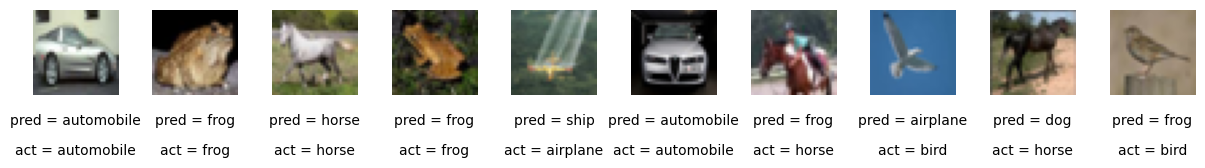

In [72]:
display(preds_relu_single, actual_single)

# Output for leaky_relu

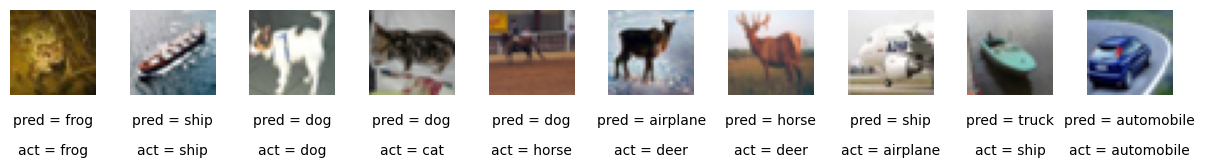

In [73]:
display(preds_leaky_relu_single, actual_single)

# Output for sigmoid

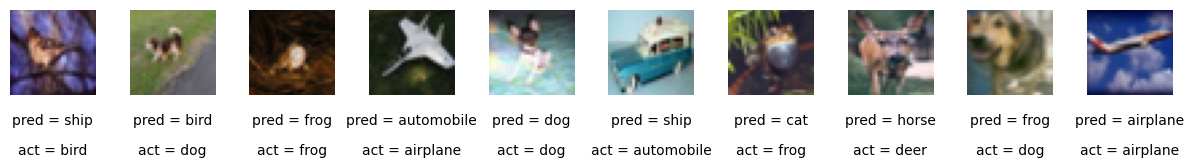

In [74]:
display(preds_sigmoid_single, actual_single)

# Observation

In [75]:
import matplotlib.pyplot as plt

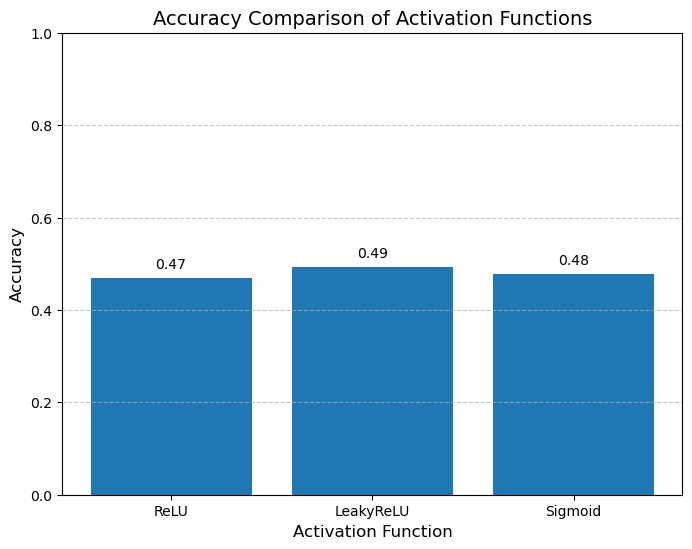

In [76]:
# Data for the bar plot
activations = ['ReLU', 'LeakyReLU', 'Sigmoid']
accuracies = [accuracy_relu, accuracy_leaky_relu, accuracy_sigmoid]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(activations, accuracies)

# Add labels, title, and grid
plt.xlabel('Activation Function', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Activation Functions', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
   plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)

# Show the plot
plt.show()

Considering the results, LeakyReLU proves to be the most efficient activation function for this task. Its ability to address the "dying ReLU" problem ensures stability and performance, making it an excellent choice for deep learning models, especially when applied to datasets like CIFAR-10.